# Note : you can skip the data separation section and start from "Training with divided data" section.

## you just need to change a few things
 * rename the dataframe from TrainOnly.csv to Train.csv which is the original data without being seperated.
 * Avoid the entire test data section( since it will not be available)
 * Do not run the remappend_ext(v) function



In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *

/home/thapelo/Anaconda3.1/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


# Data seperation --- can avoid and use train data directly as this takes some time 

In [2]:
# Original full data
import pandas as pd
p = './Train.csv'
dforigin = pd.read_csv(p, sep=",", dtype=str)

In [3]:
dforigin.head()

,Image_ID,class,xmin,ymin,width,height
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0


In [4]:
# append extension to image
def append_ext(v):
       return v+".jpg"

In [5]:
dforigin["Image_ID"]= dforigin["Image_ID"].apply(append_ext)

In [6]:
listimageName = dforigin["Image_ID"]

In [7]:
y  =  dforigin['class']

In [8]:
# listimageName[0]

In [9]:
# Dividing data into test and train ==> getting shuffled data
import numpy as np
np.random.seed(42)
shuffle_indices = np.random.permutation(np.arange(len(dforigin['class'])))
print(shuffle_indices)

[1896 2801 1961 ...  860 3507 3174]


In [10]:
#shuffled x and corresssponding y
x_shuffled = listimageName[shuffle_indices]
y_shuffled = y[shuffle_indices]

In [11]:
# Get ten  percent as test data
training_rate = 0.9
train_len = int(len(y) * training_rate)
print(train_len)

3515


In [12]:
# Training data
x_train = x_shuffled[:train_len]
y_train = y_shuffled[:train_len]

# Test data
x_test = x_shuffled[train_len:]
y_test = y_shuffled[train_len:]

# Creating CSV files

In [13]:
# insert data into new dataframe
l =[]
for i in y_train:
    l.append(i)
    
# create dataframe
trainonly = pd.DataFrame(list(x_train), columns =['ImageName'])
trainonly['Label'] = l

In [14]:
# convvert to csv
trainonly.to_csv('TrainOnly.csv')

In [15]:
trainonly.head()

,ImageName,Label
0,ID_HCSCI94Q.jpg,fruit_brownspot
1,ID_PU2T56XW.jpg,fruit_brownspot
2,ID_I5JTHKQA.jpg,fruit_healthy
3,ID_JJCG82MF.jpg,fruit_healthy
4,ID_E3Z10NW3.jpg,fruit_healthy


In [16]:
# working with test now
t =[]
for i in y_test:
    t.append(i)
# create dataframe
testonly = pd.DataFrame(list(x_test), columns =['ImageName'])
testonly['Label'] = t    

In [17]:
testonly.head()

,ImageName,Label
0,ID_WHR5L25T.jpg,fruit_healthy
1,ID_E1PQSM32.jpg,fruit_brownspot
2,ID_Z5S7N9D5.jpg,fruit_healthy
3,ID_BW71BB93.jpg,fruit_woodiness
4,ID_YMPVFZN5.jpg,fruit_brownspot


In [18]:
# convert to csv
testonly.to_csv('TestOnly.csv')

# Create a function that passes an image to a folder ==> Train or Test

In [19]:
#copy and paste file to directory. 
def check_and_pass(dir, filename):
    classname =  dir
    os.environ["classname"] = classname
    file_path = "%s" % (classname)

    if  os.path.exists(file_path): 
           # copy file in the directory
           !cp -r  ./Train_Images/Train_Images/"$filename"  "$file_path" 

In [ ]:
# move images to train folder
base = './TrainImagesdivide/'

for im_name in  list(x_train):
#          pa = base + im_name
          check_and_pass(base, im_name)  

In [ ]:
# move images to test folder
import os
base = './TestImagesdivide/'

for im_name in  list(x_test):
#          pa = base + im_name
         
         check_and_pass(base, im_name)

# You are ready to start working with your train data

# Training with divided train data

In [2]:
#train  data
import pandas as pd
pth = './TrainOnly.csv'
df = pd.read_csv(pth, sep=',')

In [3]:
df.head()

,Unnamed: 0,ImageName,Label
0,0,ID_HCSCI94Q.jpg,fruit_brownspot
1,1,ID_PU2T56XW.jpg,fruit_brownspot
2,2,ID_I5JTHKQA.jpg,fruit_healthy
3,3,ID_JJCG82MF.jpg,fruit_healthy
4,4,ID_E3Z10NW3.jpg,fruit_healthy


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

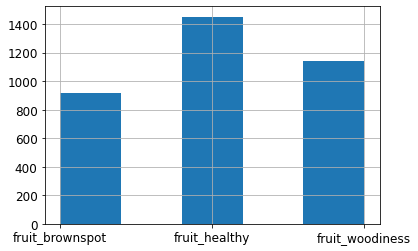

In [5]:
# class imbalance
import matplotlib.pyplot as plt
df['Label'].hist(bins=5)
plt.show()

In [6]:
# remove the extention
import os
def remappend_ext(v):
       return os.path.splitext(v)[0]

In [7]:
df["Image_ID"]= df["ImageName"].apply(remappend_ext)

In [8]:
df.head()

,ImageName,Label,Image_ID
0,ID_HCSCI94Q.jpg,fruit_brownspot,ID_HCSCI94Q
1,ID_PU2T56XW.jpg,fruit_brownspot,ID_PU2T56XW
2,ID_I5JTHKQA.jpg,fruit_healthy,ID_I5JTHKQA
3,ID_JJCG82MF.jpg,fruit_healthy,ID_JJCG82MF
4,ID_E3Z10NW3.jpg,fruit_healthy,ID_E3Z10NW3


In [9]:
df.drop('ImageName', axis=1, inplace=True)

In [10]:
df.head()

,Label,Image_ID
0,fruit_brownspot,ID_HCSCI94Q
1,fruit_brownspot,ID_PU2T56XW
2,fruit_healthy,ID_I5JTHKQA
3,fruit_healthy,ID_JJCG82MF
4,fruit_healthy,ID_E3Z10NW3


In [11]:
# Add the image filenames (will be useful)
df['fn'] = df['Image_ID'].map(lambda s: 'TrainImagesdivide/'+'_'.join(s.split('_')[:2]))

# Test data

In [12]:

tht = './TestOnly.csv'
dftest = pd.read_csv(tht, sep=",", dtype=str)

In [13]:
len(dftest)

391

In [14]:
dftest.drop('Unnamed: 0', axis=1, inplace=True)



In [15]:
dftest["Image_ID"]= dftest["ImageName"].apply(remappend_ext)

In [16]:
# Add the image filenames (will be useful)
dftest['fn'] = dftest['Image_ID'].map(lambda s: 'TestImagesdivide/'+'_'.join(s.split('_')[:2]))

In [17]:
len(dftest)

391

# Create dataloaders from train data with 0.2  as  validations set

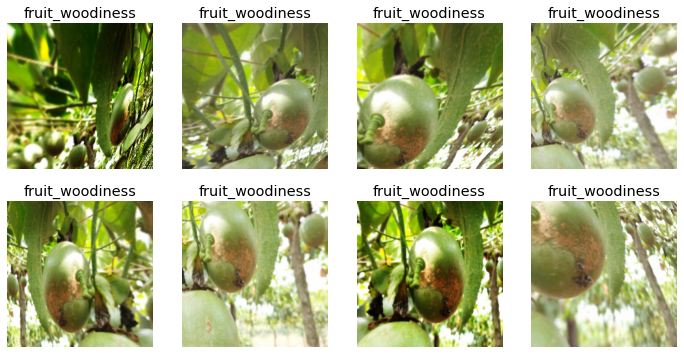

In [20]:
# Create the dataloaders
dls = ImageDataLoaders.from_df(df, fn_col='fn', label_col='Label', suff='.jpg', item_tfms=RandomResizedCrop(224, min_scale=0.3),batch_tfms=aug_transforms(mult= 2), splitter=RandomSplitter(valid_pct=0.2, seed=42))
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
# merge test dataloader
test_dl = dls.test_dl(dftest, with_labels=True)


In [25]:
# pytorch 2d convolution with relu activation.
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, (7,7), (2, 2), (3, 3), bias=False)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res


def conv4(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, (4,4), (2, 2), (3, 3), bias=False)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

# pytorch 2d convolution with relu activation.
def conv3kern(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, (8, 8), (2, 2), (3, 3), bias=False)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

# # pytorch 2d convolution with relu activation.
# def conv3k(ni, nf, ks=3, act=True):
#     res = nn.Conv2d(ni, nf, (6,6, (2, 2), (3, 3), bias=False)
#     if act: res = nn.Sequential(res, nn.ReLU())
#     return res

# STUDY CNN(Model)

In [26]:
simple_cnn = sequential(
    
    conv(3 ,16), 
    nn.BatchNorm2d(16),#14x14
    conv(16 ,32),
#     nn.BatchNorm2d(32),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=1),#7x7
    nn.Dropout(p=0.5),
    conv(32,64),  
    nn.BatchNorm2d(64),
    conv(64,256),           #2x2
#     nn.BatchNorm2d(128),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
    nn.Dropout(p=0.25),
    conv(256,512), 
#     nn.BatchNorm2d(256),#4x4
    conv(512,512),
    nn.BatchNorm2d(512),#4x4
# #     #2x2
    nn.MaxPool2d(kernel_size=2, stride=2, padding = 1 ),
    nn.Dropout(p=0.25),
    
    Flatten(),
   
#     nn.Linear(1600,1280),
#     nn.ReLU(),
#     nn.Linear(1280,1024),
#     nn.ReLU(),
#     nn.Linear(1024, 819),
#     nn.ReLU(),
#     nn.Linear(819,655),
#     nn.ReLU(),
#     nn.Linear(655, 3),
    nn.Linear(2048 ,812),
#     nn.ReLU(),
#     nn.Linear(912,415),
    
    nn.ReLU(),
    nn.Linear(812,3),
    nn.Softmax(dim=-1),
)

In [22]:
# # varying kernel without batch normalization
# simple_cnn = sequential(
    
#     conv(3 ,20), 
# #     nn.BatchNorm2d(16),#14x14
#     conv(20 ,40),
# #     nn.BatchNorm2d(32),
#     nn.MaxPool2d(kernel_size=2, stride=2, padding=1),#7x7
#     nn.Dropout(p=0.5),
#     conv3kern(40,84),  
# #     nn.BatchNorm2d(64),
#     conv3kern(84,256),           #2x2
# #     nn.BatchNorm2d(128),
#     nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
#     nn.Dropout(p=0.25),
#     conv(256,512), 
# #     nn.BatchNorm2d(256),#4x4
#     conv(512,512),
# #     nn.BatchNorm2d(512),#4x4
# # #     #2x2
#     nn.MaxPool2d(kernel_size=2, stride=2, padding = 1 ),
#     nn.Dropout(p=0.25),
    
#     Flatten(),
   
# #     nn.Linear(1600,1280),
# #     nn.ReLU(),
# #     nn.Linear(1280,1024),
# #     nn.ReLU(),
# #     nn.Linear(1024, 819),
# #     nn.ReLU(),
# #     nn.Linear(819,655),
# #     nn.ReLU(),
# #     nn.Linear(655, 3),
#     nn.Linear(4608 ,812),
# #     nn.ReLU(),
# #     nn.Linear(912,415),
    
#     nn.ReLU(),
#     nn.Linear(812,3),
#     nn.Softmax(dim=-1),
# )

In [26]:
# # varying kernel with batch normalization
# # normalization on the 2nd conv
# simple_cnn = sequential(
    
#     conv(3 ,20), 
# #     nn.BatchNorm2d(20),#14x14
#     conv(20 ,40),
# #     nn.BatchNorm2d(40),
#     nn.MaxPool2d(kernel_size=2, stride=2, padding=1),#7x7
#     nn.Dropout(p=0.5),
#     conv3kern(40,84),  
# #     nn.BatchNorm2d(84),
#     conv3kern(84,256),           #2x2
#     nn.BatchNorm2d(256),
#     nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
#     nn.Dropout(p=0.25),
#     conv(256,512), 
# #     nn.BatchNorm2d(256),#4x4
#     conv(512,512),
# #     nn.BatchNorm2d(512),#4x4
# # #     #2x2
#     nn.MaxPool2d(kernel_size=2, stride=2, padding = 1 ),
#     nn.Dropout(p=0.25),
    
#     Flatten(),
   
# #     nn.Linear(1600,1280),
# #     nn.ReLU(),
# #     nn.Linear(1280,1024),
# #     nn.ReLU(),
# #     nn.Linear(1024, 819),
# #     nn.ReLU(),
# #     nn.Linear(819,655),
# #     nn.ReLU(),
# #     nn.Linear(655, 3),
#     nn.Linear(4608 ,812),
# #     nn.ReLU(),
# #     nn.Linear(912,415),
    
#     nn.ReLU(),
#     nn.Linear(812,3),
#     nn.Softmax(dim=-1),
# )

# compile hyperparameters

In [28]:
# create learner resnet 34
avg = 'macro'
metrics=[accuracy, Precision(average=avg), error_rate]
learn = Learner(dls, simple_cnn, opt_func =Adam, loss_func=nn.CrossEntropyLoss(), metrics=metrics)

In [32]:
# fit 
learn.fit(100)

epoch,train_loss,valid_loss,accuracy,precision_score,error_rate,time
0,0.972353,0.918829,0.608819,0.480187,0.391181,00:43
1,0.958106,0.883100,0.652916,0.435131,0.347084,00:43
2,0.936798,0.915378,0.610242,0.434184,0.389758,00:43
3,0.917604,1.115903,0.419630,0.465980,0.580370,00:43
4,0.915421,0.885110,0.657184,0.632203,0.342817,00:43
5,0.901732,1.025366,0.513514,0.479325,0.486486,00:43
6,0.894311,0.829650,0.708393,0.673562,0.291607,00:43
7,0.883921,0.829517,0.708393,0.683342,0.291607,00:43
8,0.873347,1.032536,0.504979,0.667680,0.495021,00:43
9,0.866290,0.929069,0.605974,0.652577,0.394026,00:43


/home/thapelo/Anaconda3.1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thapelo/Anaconda3.1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
learn.summary()

/home/thapelo/Anaconda3.1/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 16 x 112 x 112 
Conv2d                                    2352       True      
ReLU                                                           
BatchNorm2d                               32         True      
____________________________________________________________________________
                     64 x 32 x 56 x 56   
Conv2d                                    25088      True      
ReLU                                                           
MaxPool2d                                                      
Dropout                                                        
____________________________________________________________________________
                     64 x 64 x 15 x 15   
Conv2d                                    100352     True      
ReLU                                                           
BatchNorm2d                               128      

# Plots 

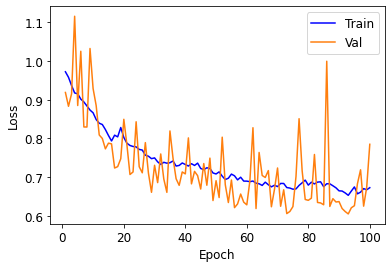

In [33]:
# Get training and test loss histories with varying kernel
import matplotlib.pyplot as plt 
import numpy as np 
training_loss = L(learn.recorder.values).itemgot(0)
test_loss = L(learn.recorder.values).itemgot(1)

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'b-')
plt.plot(epoch_count, test_loss, color='#ff7f0e')
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [30]:
# # Get training and test loss histories
# import matplotlib.pyplot as plt 
# import numpy as np 
# training_loss = L(learn.recorder.values).itemgot(0)
# test_loss = L(learn.recorder.values).itemgot(1)

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss) + 1)

# # Visualize loss history
# plt.plot(epoch_count, training_loss, 'b-')
# plt.plot(epoch_count, test_loss, color='#ff7f0e')
# plt.legend(['Train', 'Val'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show();

In [31]:
# # Get training and test loss histories
# import matplotlib.pyplot as plt 
# import numpy as np 
# training_loss = L(learn.recorder.values).itemgot(2)
# # test_loss = L(learn.recorder.values).itemgot(1)

# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss) + 1)

# # Visualize loss history
# plt.plot(epoch_count, training_loss, 'b-')
# # plt.plot(epoch_count, test_loss, color='#ff7f0e')
# plt.legend([ 'Val'])
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show();

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

# Predictions

In [34]:
#with labels
preds = learn.get_preds(dl=test_dl)

In [35]:
preds

(tensor([[2.5392e-05, 1.0745e-03, 9.9890e-01],
         [1.0000e+00, 1.1450e-08, 2.2372e-06],
         [1.1244e-19, 1.0000e+00, 4.0499e-14],
         ...,
         [2.0898e-37, 1.0309e-38, 1.0000e+00],
         [1.6994e-12, 1.0000e+00, 3.4167e-07],
         [1.0000e+00, 2.3488e-13, 3.6067e-12]]),
 TensorCategory([1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1,
         1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0,
         0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0,
         1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2

In [36]:
def accuracy_np(preds, targs):
    preds = np.argmax(preds, 1).float()
#     print(preds)
    return (preds==targs).float().mean()

In [37]:
trg = preds[1].float()

In [38]:
# get test accuracy
accuracy_np(preds[0],torch.Tensor(trg).float())

tensor(0.8107)

In [ ]:
# # get test accuracy
# accuracy_np(preds[0],torch.Tensor(trg).float())

# SAVE MODEL

In [35]:
learn.save('StudyCNN95BestVkernelNorm')

Path('models/StudyCNN95BestVkernelNorm.pth')

# Done with Study CNN 

# Now working with Transfer learning

The data proccessing is the same so you simple call the resnet function in the cell below


In [ ]:
# create learner resnet 34
avg = 'macro'
metrics=[accuracy, Precision(average=avg), error_rate]
learn = cnn_learner(dls, resnet34, metrics=metrics)
learn.fine_tune(10, cbs=[ShowGraphCallback()])

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# Get training and test loss histories
training_loss = L(learn.recorder.values).itemgot(0)
test_loss = L(learn.recorder.values).itemgot(1)

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'b-')
plt.plot(epoch_count, test_loss, color='#ff7f0e')
plt.legend(['Train', 'Val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# predicting the unlabelled data

In [ ]:
#with labels
preds = learn.get_preds(dl=test_dl)

In [ ]:
# Checking the format
ss = pd.read_csv('./SampleSubmission.csv')
ss.head(2)

In [ ]:
preds[0][0], np.argsort(preds[0])[0] 

In [ ]:
learn.dls.vocab

In [ ]:
# Need to make sure order is right - note staring with the highest prob
test['prediction1'] = [learn.dls.vocab[p[2]] for p in np.argsort(preds[0])]
test['prediction2'] = [learn.dls.vocab[p[1]] for p in np.argsort(preds[0])]
test['prediction3'] = [learn.dls.vocab[p[0]] for p in np.argsort(preds[0])]
test.head()

In [ ]:
# Merging them into ss
ss = pd.merge(ss['Image_ID'], test[['Image_ID', 'prediction1', 'prediction2', 'prediction3']], how='left', on='Image_ID')
ss.head()

In [ ]:
ss.to_csv('sub1_ordered.csv', index=False) 

# Internet CNN 

Note : you need to run the conv function first. provided in the first cnn

In [ ]:
internet_cnn = sequential(
    
    conv(3 ,16),            #14x14
    conv(16 ,32),
    nn.MaxPool2d(kernel_size=2, stride=2, padding=1),#7x7
    nn.Dropout(p=0.5),
    conv(32,64),           #4x4
    conv(64,64),           #2x2
    nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
    nn.Dropout(p=0.25),
#     Flatt200en(),
#     conv(32,2, act=False), #1x1
    Flatten(),
    nn.Linear(1600,512),
    nn.ReLU(),
    nn.Linear(512,3),
    nn.Softmax(dim=-1),
)

In [ ]:
# create learner resnet 34
avg = 'macro'
metrics=[accuracy, Precision(average=avg), error_rate]
learn = Learner(dls, simple_cnn, opt_func =Adam, loss_func=nn.CrossEntropyLoss(), metrics=metrics)

In [ ]:
learn.summary()

In [ ]:
learn.fit(100)